In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

# Note: Some metrics need to be defined manually

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
data = pd.read_csv("C:/Users/king0/OneDrive/桌面/DL DATA/NVDA15-23.csv")
data

,Date,Y,Lag_1,Lag_2,Lag_3
0,2015/1/2,5.032500,5.012500,5.092500,5.140000
1,2015/1/5,4.947500,5.032500,5.012500,5.092500
2,2015/1/6,4.797500,4.947500,5.032500,5.012500
3,2015/1/7,4.785000,4.797500,4.947500,5.032500
4,2015/1/8,4.965000,4.785000,4.797500,4.947500
...,...,...,...,...,...
2109,2023/5/19,312.640015,316.779999,301.779999,292.130005
2110,2023/5/22,311.760010,312.640015,316.779999,301.779999
2111,2023/5/23,306.880005,311.760010,312.640015,316.779999
2112,2023/5/24,305.380005,306.880005,311.760010,312.640015


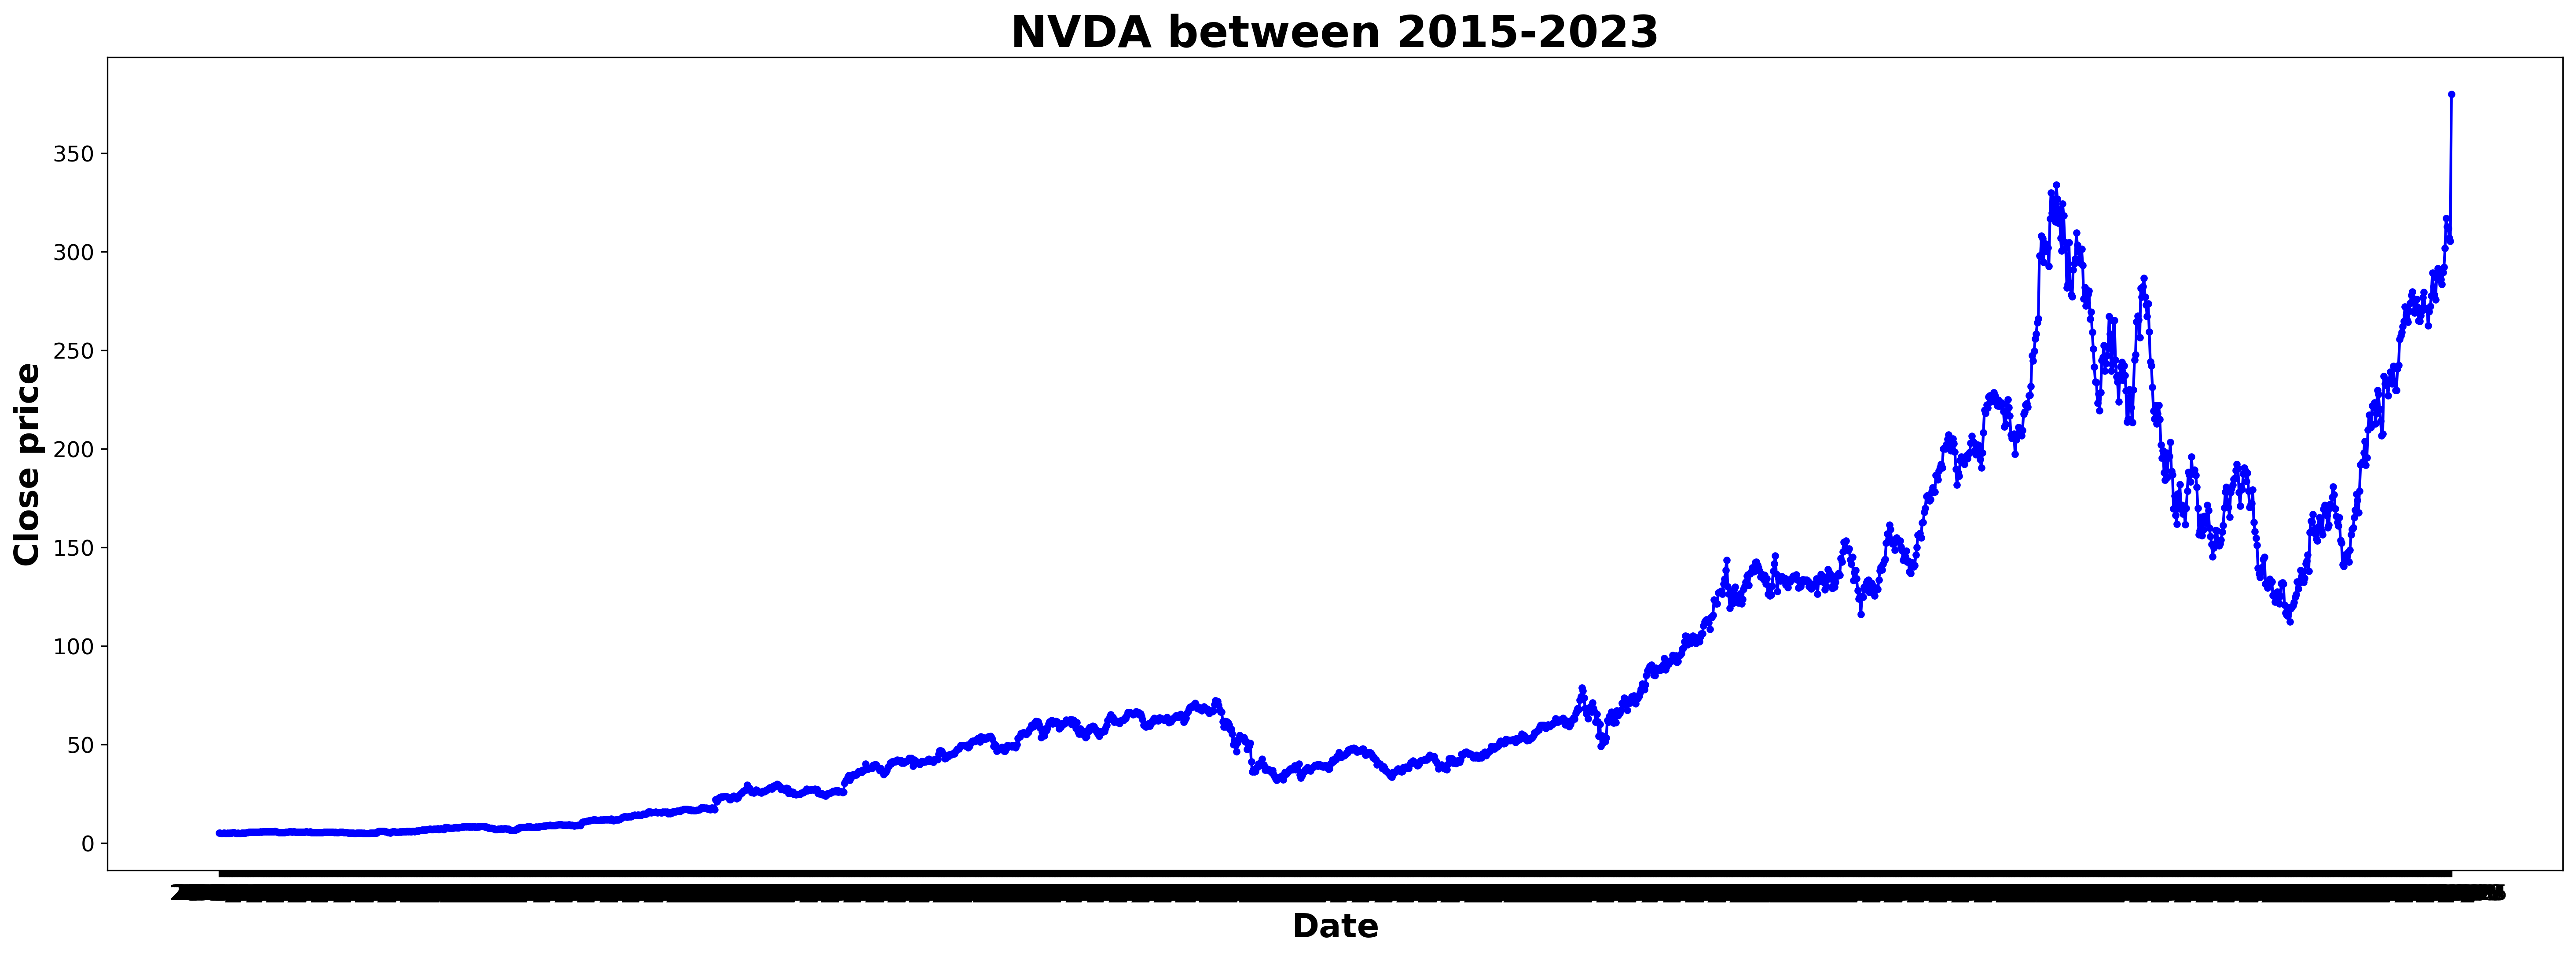

In [ ]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('NVDA between 2015-2023',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close price',fontsize=18,weight='bold')

# Actual by predicted plot
plt.plot(data['Date'],data['Y'],marker='.',color='blue')

# Set the axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
x=data.drop(['Date' , 'Y'],axis=1).copy()
x.head()

,Lag_1,Lag_2,Lag_3
0,5.0125,5.0925,5.1400
1,5.0325,5.0125,5.0925
2,4.9475,5.0325,5.0125
3,4.7975,4.9475,5.0325
4,4.7850,4.7975,4.9475


In [ ]:
y=data['Y'].copy()
y.head()

0    5.0325
1    4.9475
2    4.7975
3    4.7850
4    4.9650
Name: Y, dtype: float64

# Rolling window

In [ ]:
#Rolling window 切資料
x_train1 = x[0:422]
x_validation1 = x[422:844]
y_train1 = y[0:422]
y_validation1 = y[422:844]

x_train2 = x[422:844]
x_validation2 = x[844:1266]
y_train2 = y[422:844]
y_validation2 = y[844:1266]

x_train3 = x[844:1266]
x_validation3 = x[1266:1688]
y_train3 = y[844:1266]
y_validation3 = y[1266:1688]

# 第一組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train1)
new_x_train1=pd.DataFrame(data=normalize_df)
new_x_train1.columns=x.columns
print(new_x_train1.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation1)
new_x_validation1=pd.DataFrame(data=normalize_df)
new_x_validation1.columns=x.columns
print(new_x_validation1.head())

      Lag_1     Lag_2     Lag_3
0  0.020677  0.028018  0.032346
1  0.022495  0.020729  0.028018
2  0.014769  0.022551  0.020729
3  0.001136  0.014806  0.022551
4  0.000000  0.001139  0.014806
      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982


# 第二組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train2)
new_x_train2=pd.DataFrame(data=normalize_df)
new_x_train2.columns=x.columns
print(new_x_train2.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation2)
new_x_validation2=pd.DataFrame(data=normalize_df)
new_x_validation2.columns=x.columns
print(new_x_validation2.head())

      Lag_1     Lag_2     Lag_3
0  0.015762  0.019009  0.009531
1  0.018852  0.015762  0.019009
2  0.013982  0.018852  0.015762
3  0.016339  0.013982  0.018852
4  0.000000  0.016339  0.013982
      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371


# 第三組正規化

In [ ]:
#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_train3)
new_x_train3=pd.DataFrame(data=normalize_df)
new_x_train3.columns=x.columns
print(new_x_train3.head())

#做正規化
MMscaler=MinMaxScaler(feature_range=(0, 1))
normalize_df=MMscaler.fit_transform(x_validation3)
new_x_validation3=pd.DataFrame(data=normalize_df)
new_x_validation3.columns=x.columns
print(new_x_validation3.head())

      Lag_1     Lag_2     Lag_3
0  0.793074  0.759921  0.749322
1  0.819879  0.793074  0.759921
2  0.785371  0.819879  0.793074
3  0.790486  0.785371  0.819879
4  0.730096  0.790486  0.785371
      Lag_1     Lag_2     Lag_3
0  0.077483  0.066804  0.064992
1  0.070931  0.077483  0.066804
2  0.068547  0.070931  0.077483
3  0.073231  0.068547  0.070931
4  0.073719  0.073231  0.068547


# 6. Creating Net 

# Important: Define customized loss function (RMSE)

In [ ]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

# Sequential style coding for creating net

In [ ]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

# train1 and validation1 train

第一組 學習率 = 0.001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train1, y_train1, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation1, y_validation1))

Epoch 1/300
14/14 [==============================] - 1s 19ms/step - loss: 7.6373 - mean_absolute_percentage_error: 98.7119 - val_loss: 38.1198 - val_mean_absolute_percentage_error: 99.1549
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 7.2282 - mean_absolute_percentage_error: 92.9114 - val_loss: 37.3938 - val_mean_absolute_percentage_error: 97.0208
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 6.2241 - mean_absolute_percentage_error: 78.8388 - val_loss: 35.6457 - val_mean_absolute_percentage_error: 91.8824
Epoch 4/300
14/14 [==============================] - 0s 7ms/step - loss: 3.8541 - mean_absolute_percentage_error: 45.4749 - val_loss: 31.5578 - val_mean_absolute_percentage_error: 79.9068
Epoch 5/300
14/14 [==============================] - 0s 10ms/step - loss: 1.8966 - mean_absolute_percentage_error: 27.4003 - val_loss: 27.5065 - val_mean_absolute_percentage_error: 68.3374
Epoch 6/300
14/14 [==============================] - 0s 7m

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

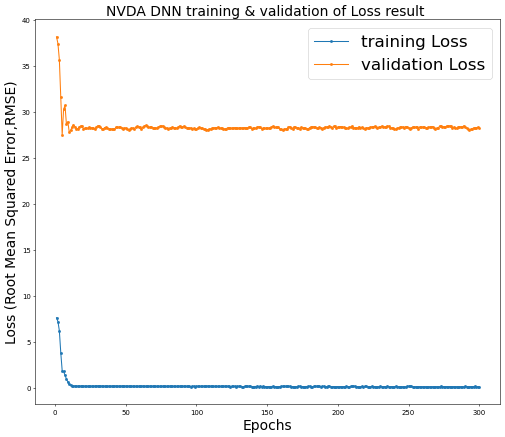

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

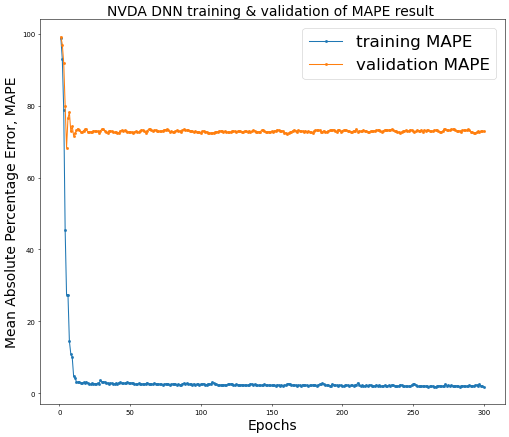

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第一組 學習率 = 0.0001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.0001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train1, y_train1, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation1, y_validation1))

Epoch 1/300
14/14 [==============================] - 1s 23ms/step - loss: 7.6984 - mean_absolute_percentage_error: 99.6350 - val_loss: 38.3226 - val_mean_absolute_percentage_error: 99.7923
Epoch 2/300
14/14 [==============================] - 0s 8ms/step - loss: 7.6603 - mean_absolute_percentage_error: 99.1566 - val_loss: 38.2644 - val_mean_absolute_percentage_error: 99.6423
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 7.6164 - mean_absolute_percentage_error: 98.6120 - val_loss: 38.1987 - val_mean_absolute_percentage_error: 99.4732
Epoch 4/300
14/14 [==============================] - 0s 7ms/step - loss: 7.5681 - mean_absolute_percentage_error: 98.0083 - val_loss: 38.1248 - val_mean_absolute_percentage_error: 99.2820
Epoch 5/300
14/14 [==============================] - 0s 7ms/step - loss: 7.5128 - mean_absolute_percentage_error: 97.3132 - val_loss: 38.0402 - val_mean_absolute_percentage_error: 99.0628
Epoch 6/300
14/14 [==============================] - 0s 7ms

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

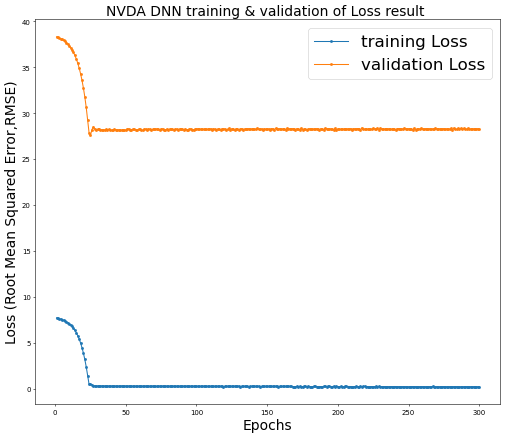

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

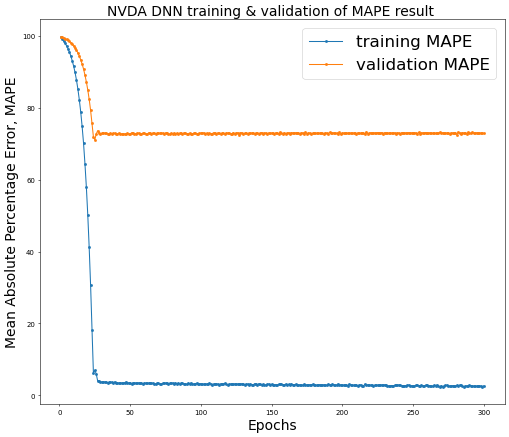

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第一組 學習率 = 0.00001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.00001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train1, y_train1, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation1, y_validation1))

Epoch 1/300
14/14 [==============================] - 1s 22ms/step - loss: 7.7101 - mean_absolute_percentage_error: 99.7824 - val_loss: 38.3655 - val_mean_absolute_percentage_error: 99.9034
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 7.7053 - mean_absolute_percentage_error: 99.7261 - val_loss: 38.3591 - val_mean_absolute_percentage_error: 99.8868
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 7.7020 - mean_absolute_percentage_error: 99.6799 - val_loss: 38.3527 - val_mean_absolute_percentage_error: 99.8703
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 7.6968 - mean_absolute_percentage_error: 99.6163 - val_loss: 38.3462 - val_mean_absolute_percentage_error: 99.8536
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 7.6915 - mean_absolute_percentage_error: 99.5567 - val_loss: 38.3396 - val_mean_absolute_percentage_error: 99.8365
Epoch 6/300
14/14 [==============================] - 0s 5ms

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

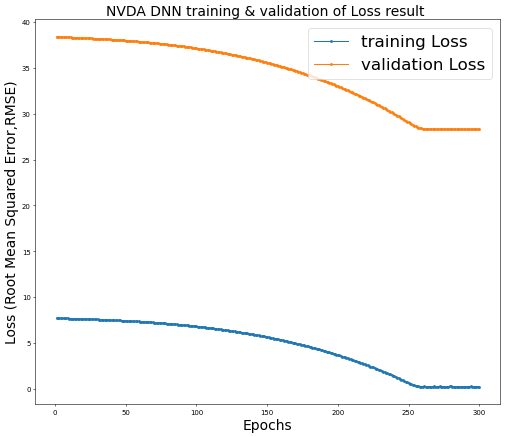

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

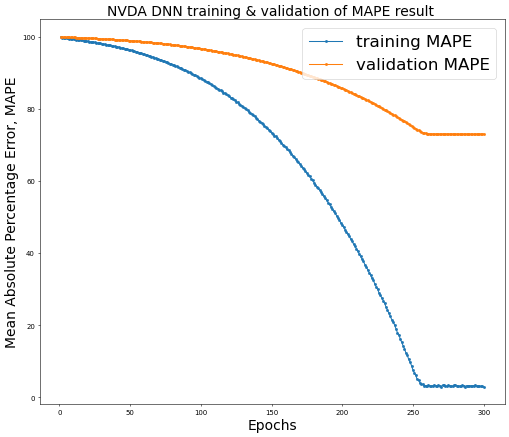

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

# train2 and validation2 train

第二組 學習率 = 0.001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train2, y_train2, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation2, y_validation2))

Epoch 1/300
14/14 [==============================] - 1s 17ms/step - loss: 38.1746 - mean_absolute_percentage_error: 99.3714 - val_loss: 48.9186 - val_mean_absolute_percentage_error: 98.8941
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 37.4015 - mean_absolute_percentage_error: 97.1542 - val_loss: 47.7371 - val_mean_absolute_percentage_error: 96.4804
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 35.5958 - mean_absolute_percentage_error: 92.0792 - val_loss: 45.0290 - val_mean_absolute_percentage_error: 90.9298
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 31.6199 - mean_absolute_percentage_error: 80.4648 - val_loss: 39.0612 - val_mean_absolute_percentage_error: 78.6696
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 22.8186 - mean_absolute_percentage_error: 55.6315 - val_loss: 26.2518 - val_mean_absolute_percentage_error: 52.4185
Epoch 6/300
14/14 [==============================] - 0

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

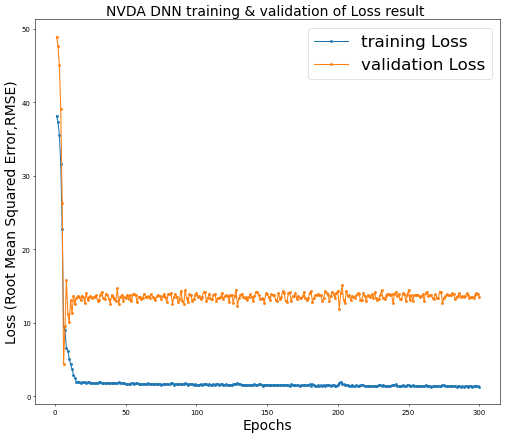

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

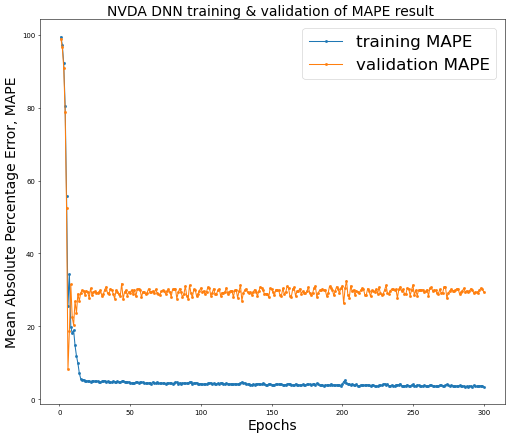

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第二組 學習率 = 0.0001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.0001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train2, y_train2, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation2, y_validation2))

Epoch 1/300
14/14 [==============================] - 1s 15ms/step - loss: 38.4057 - mean_absolute_percentage_error: 99.9900 - val_loss: 49.4317 - val_mean_absolute_percentage_error: 99.9315
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 38.3417 - mean_absolute_percentage_error: 99.8254 - val_loss: 49.3704 - val_mean_absolute_percentage_error: 99.8119
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 38.2726 - mean_absolute_percentage_error: 99.6489 - val_loss: 49.3031 - val_mean_absolute_percentage_error: 99.6803
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 38.1968 - mean_absolute_percentage_error: 99.4540 - val_loss: 49.2258 - val_mean_absolute_percentage_error: 99.5292
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 38.1083 - mean_absolute_percentage_error: 99.2257 - val_loss: 49.1353 - val_mean_absolute_percentage_error: 99.3529
Epoch 6/300
14/14 [==============================] - 0

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

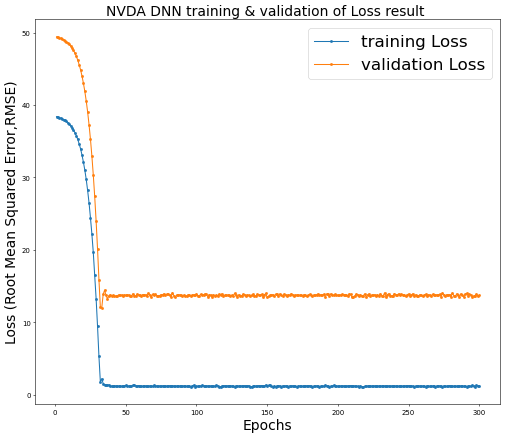

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

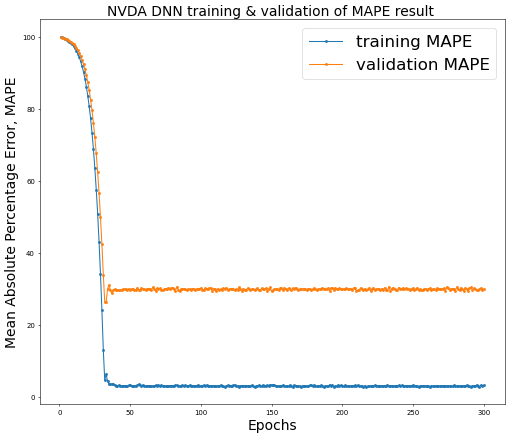

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第二組 學習率 = 0.00001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.00001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train2, y_train2, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation2, y_validation2))

Epoch 1/300
14/14 [==============================] - 1s 18ms/step - loss: 38.4055 - mean_absolute_percentage_error: 99.9962 - val_loss: 49.4622 - val_mean_absolute_percentage_error: 99.9934
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 38.4007 - mean_absolute_percentage_error: 99.9837 - val_loss: 49.4569 - val_mean_absolute_percentage_error: 99.9830
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 38.3948 - mean_absolute_percentage_error: 99.9685 - val_loss: 49.4516 - val_mean_absolute_percentage_error: 99.9726
Epoch 4/300
14/14 [==============================] - 0s 7ms/step - loss: 38.3881 - mean_absolute_percentage_error: 99.9518 - val_loss: 49.4463 - val_mean_absolute_percentage_error: 99.9622
Epoch 5/300
14/14 [==============================] - 0s 8ms/step - loss: 38.3832 - mean_absolute_percentage_error: 99.9384 - val_loss: 49.4410 - val_mean_absolute_percentage_error: 99.9519
Epoch 6/300
14/14 [==============================] - 0

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

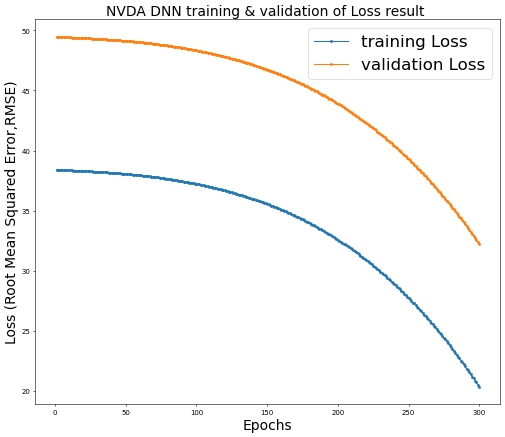

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

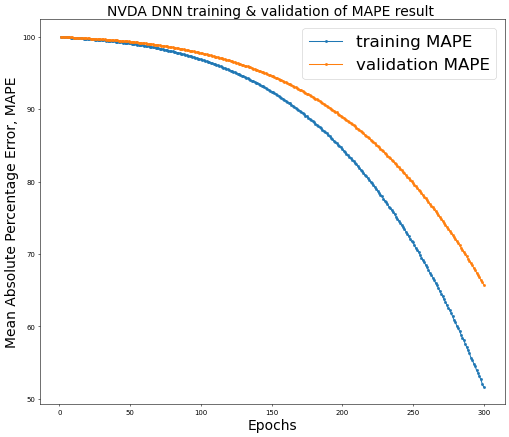

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

# train3 and validation3 train

第三組 學習率 = 0.001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train3, y_train3, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation3, y_validation3))

Epoch 1/300
14/14 [==============================] - 1s 15ms/step - loss: 49.3631 - mean_absolute_percentage_error: 99.7968 - val_loss: 127.0236 - val_mean_absolute_percentage_error: 99.7109
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 48.7807 - mean_absolute_percentage_error: 98.6636 - val_loss: 126.1662 - val_mean_absolute_percentage_error: 99.0350
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 47.5009 - mean_absolute_percentage_error: 96.1561 - val_loss: 124.1825 - val_mean_absolute_percentage_error: 97.4637
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 44.6201 - mean_absolute_percentage_error: 90.4726 - val_loss: 119.7435 - val_mean_absolute_percentage_error: 93.9384
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 38.1058 - mean_absolute_percentage_error: 77.7586 - val_loss: 110.1757 - val_mean_absolute_percentage_error: 86.3161
Epoch 6/300
14/14 [==============================

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

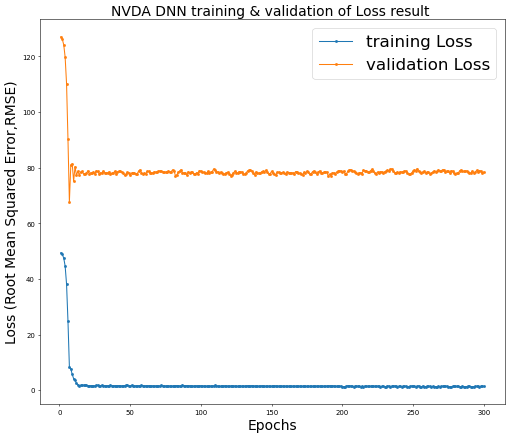

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

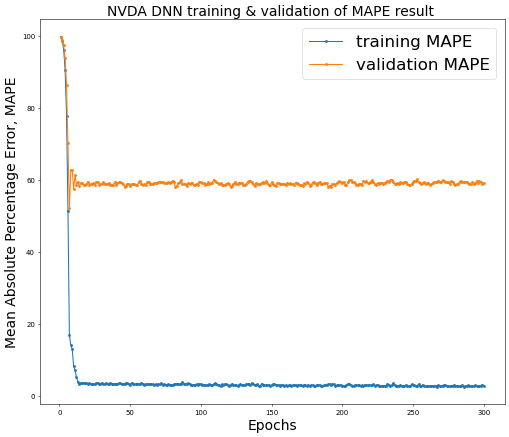

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第三組 學習率 = 0.0001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.0001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train3, y_train3, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation3, y_validation3))

Epoch 1/300
14/14 [==============================] - 1s 15ms/step - loss: 49.4391 - mean_absolute_percentage_error: 99.9494 - val_loss: 127.3382 - val_mean_absolute_percentage_error: 99.9573
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 49.3870 - mean_absolute_percentage_error: 99.8488 - val_loss: 127.2839 - val_mean_absolute_percentage_error: 99.9159
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 49.3335 - mean_absolute_percentage_error: 99.7456 - val_loss: 127.2283 - val_mean_absolute_percentage_error: 99.8735
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 49.2756 - mean_absolute_percentage_error: 99.6348 - val_loss: 127.1700 - val_mean_absolute_percentage_error: 99.8287
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 49.2166 - mean_absolute_percentage_error: 99.5206 - val_loss: 127.1064 - val_mean_absolute_percentage_error: 99.7797
Epoch 6/300
14/14 [==============================

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

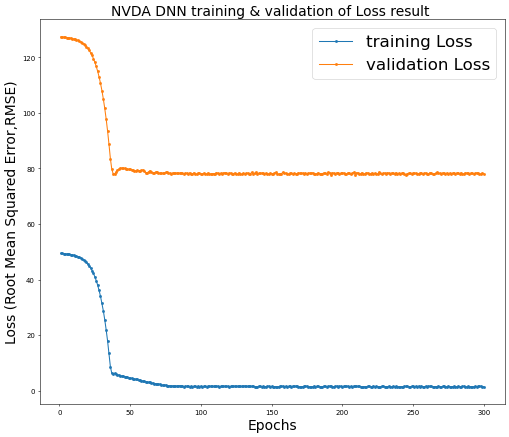

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

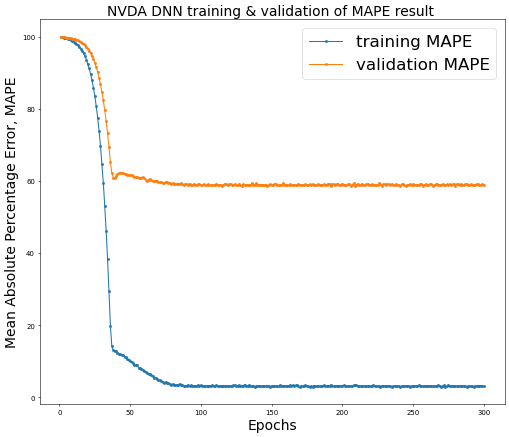

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

第三組 學習率 = 0.00001

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.00001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(new_x_train3, y_train3, epochs=300, batch_size=32,verbose=1,validation_data=(new_x_validation3, y_validation3))

Epoch 1/300
14/14 [==============================] - 1s 19ms/step - loss: 49.4395 - mean_absolute_percentage_error: 99.9513 - val_loss: 127.3665 - val_mean_absolute_percentage_error: 99.9800
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 49.4355 - mean_absolute_percentage_error: 99.9435 - val_loss: 127.3623 - val_mean_absolute_percentage_error: 99.9767
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 49.4315 - mean_absolute_percentage_error: 99.9356 - val_loss: 127.3581 - val_mean_absolute_percentage_error: 99.9733
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 49.4273 - mean_absolute_percentage_error: 99.9274 - val_loss: 127.3539 - val_mean_absolute_percentage_error: 99.9700
Epoch 5/300
14/14 [==============================] - 0s 6ms/step - loss: 49.4235 - mean_absolute_percentage_error: 99.9199 - val_loss: 127.3496 - val_mean_absolute_percentage_error: 99.9665
Epoch 6/300
14/14 [==============================

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

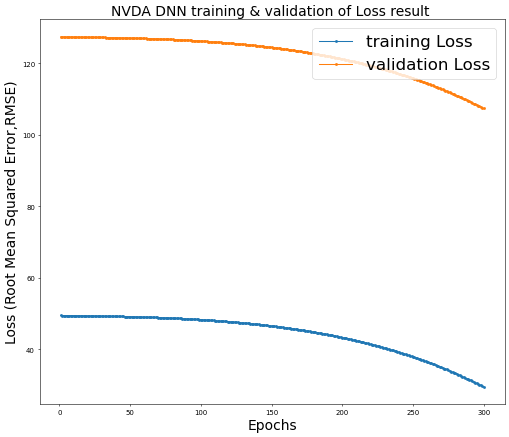

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('NVDA DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

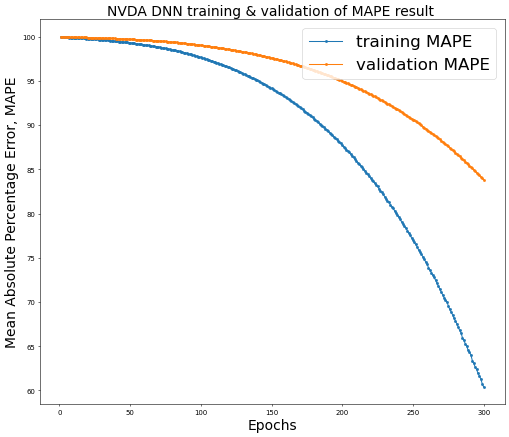

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=50)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('NVDA DNN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

# 比較最佳學習率

In [ ]:
val_lose1 = [28.2208 , 13.5590 , 78.4393]
val_lose2 = [28.2417 , 13.7336 , 78.1155]
val_lose3 = [28.2933 , 32.2441 , 107.3320]

print(round(np.average(val_lose1),4),'+/-',round(np.std(val_lose1),4))
print(round(np.average(val_lose2),4),'+/-',round(np.std(val_lose2),4))
print(round(np.average(val_lose3),4),'+/-',round(np.std(val_lose3),4))

40.073 +/- 27.7815
40.0303 +/- 27.574
55.9565 +/- 36.3638


# Fit the final model with all of the training data

In [ ]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=12, activation='linear'))

# 6.4 Add third hidden layer
model.add(Dense(units=24, activation='relu'))

model.add(Dropout(rate=0.002))

model.add(Dense(units=48, activation='linear'))

model.add(Dropout(rate=0.03))

model.add(Dense(units=96, activation='relu'))

# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net
#opt=SGD(learning_rate=0.0001,momentum=0.5)
opt=Adam(learning_rate=0.0001,beta_1=0.95)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_4 (Dense)             (None, 96)                4

In [ ]:
# Store in the history for more useful information
history=model.fit(x[0:1688], y[0:1688], epochs=300, batch_size=32,verbose=1)

Epoch 1/300
53/53 [==============================] - 1s 3ms/step - loss: 51.3755 - mean_absolute_percentage_error: 91.9262
Epoch 2/300
53/53 [==============================] - 0s 3ms/step - loss: 37.1388 - mean_absolute_percentage_error: 66.0099
Epoch 3/300
53/53 [==============================] - 0s 3ms/step - loss: 14.8318 - mean_absolute_percentage_error: 25.8346
Epoch 4/300
53/53 [==============================] - 0s 3ms/step - loss: 3.3078 - mean_absolute_percentage_error: 6.4465
Epoch 5/300
53/53 [==============================] - 0s 3ms/step - loss: 2.4414 - mean_absolute_percentage_error: 4.6585
Epoch 6/300
53/53 [==============================] - 0s 3ms/step - loss: 2.3760 - mean_absolute_percentage_error: 4.4642
Epoch 7/300
53/53 [==============================] - 0s 2ms/step - loss: 2.4840 - mean_absolute_percentage_error: 4.5699
Epoch 8/300
53/53 [==============================] - 0s 3ms/step - loss: 2.3002 - mean_absolute_percentage_error: 4.1793
Epoch 9/300
53/53 [=======

In [ ]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
model.save('RE_01.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model("D:/python/RE_01.h5")
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [ ]:
Forecast_test_data = data[1688:]
print(len(Forecast_test_data))

426


In [ ]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Y'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Y'].copy()

In [ ]:
# 8.1 Make prediction 
prediction=np.round((ANN_model.predict_on_batch(x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [ ]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Y'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
1688,2021/9/16,222.419998,216.970001,5.449997
1689,2021/9/17,219.000000,216.369995,2.630005
1690,2021/9/20,211.130005,213.190002,2.059997
1691,2021/9/21,212.460007,206.889999,5.570008
1692,2021/9/22,219.410004,205.020004,14.390000
...,...,...,...,...
2109,2023/5/19,312.640015,307.010010,5.630005
2110,2023/5/22,311.760010,307.299988,4.460022
2111,2023/5/23,306.880005,302.160004,4.720001
2112,2023/5/24,305.380005,298.829987,6.550018


In [ ]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 8.02
MSE: 119.315
RMSE: 10.923
MAPE: 3.717 %
SMAPE: 3.813 %
RAE: 0.164
MRAE: 0.0003848631206880448
MdRAE: 0.154 bench: 213.2
RSE: 0.037
RRSE: 0.192


#  Plot for comparing true value & predicted value 

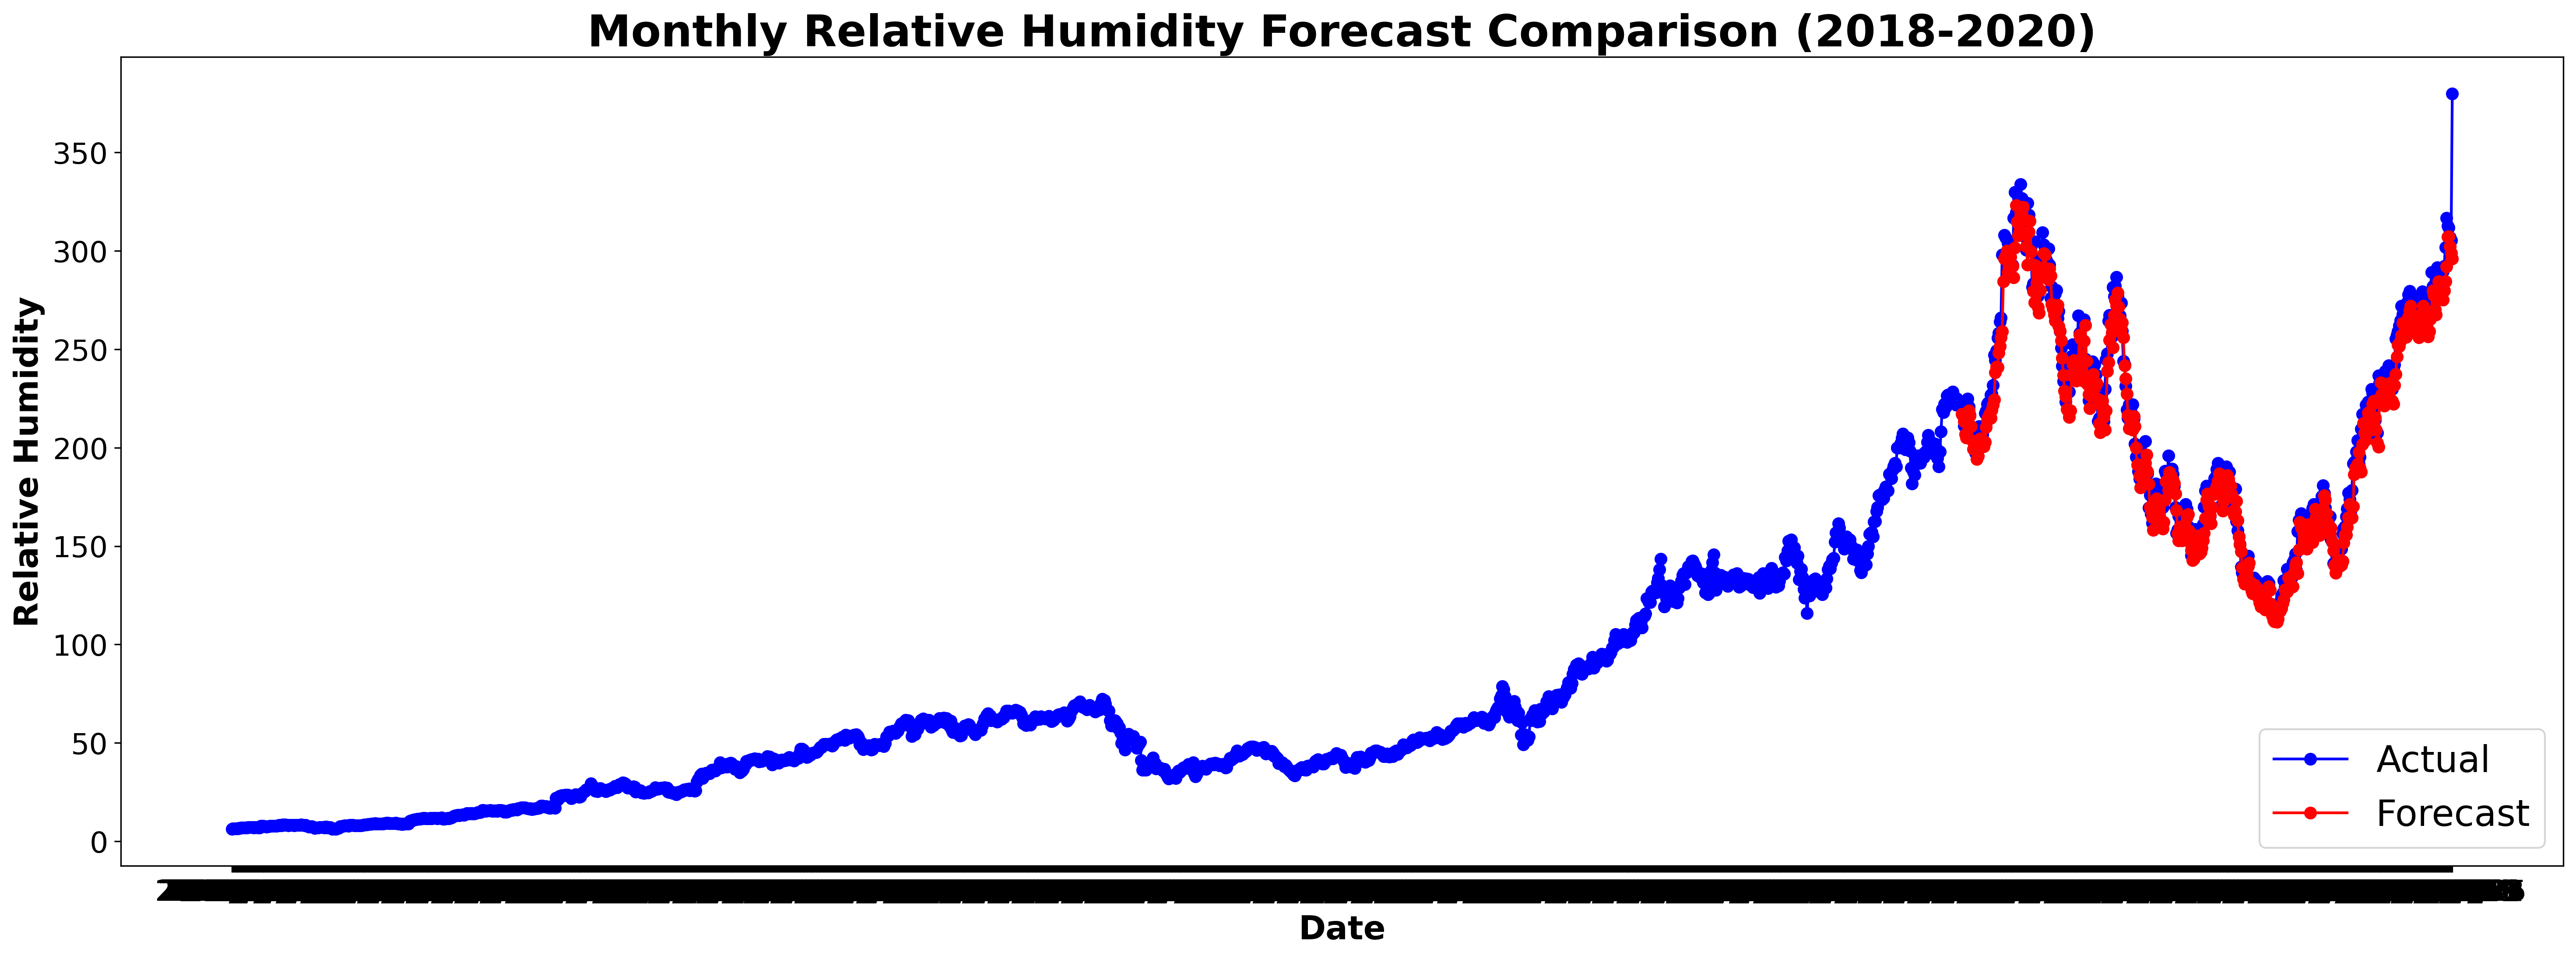

In [ ]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('Monthly Relative Humidity Forecast Comparison (2018-2020)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Relative Humidity',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(data.iloc[189:,0],data.iloc[189:,1],marker='o',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

# Actual by predicted plot

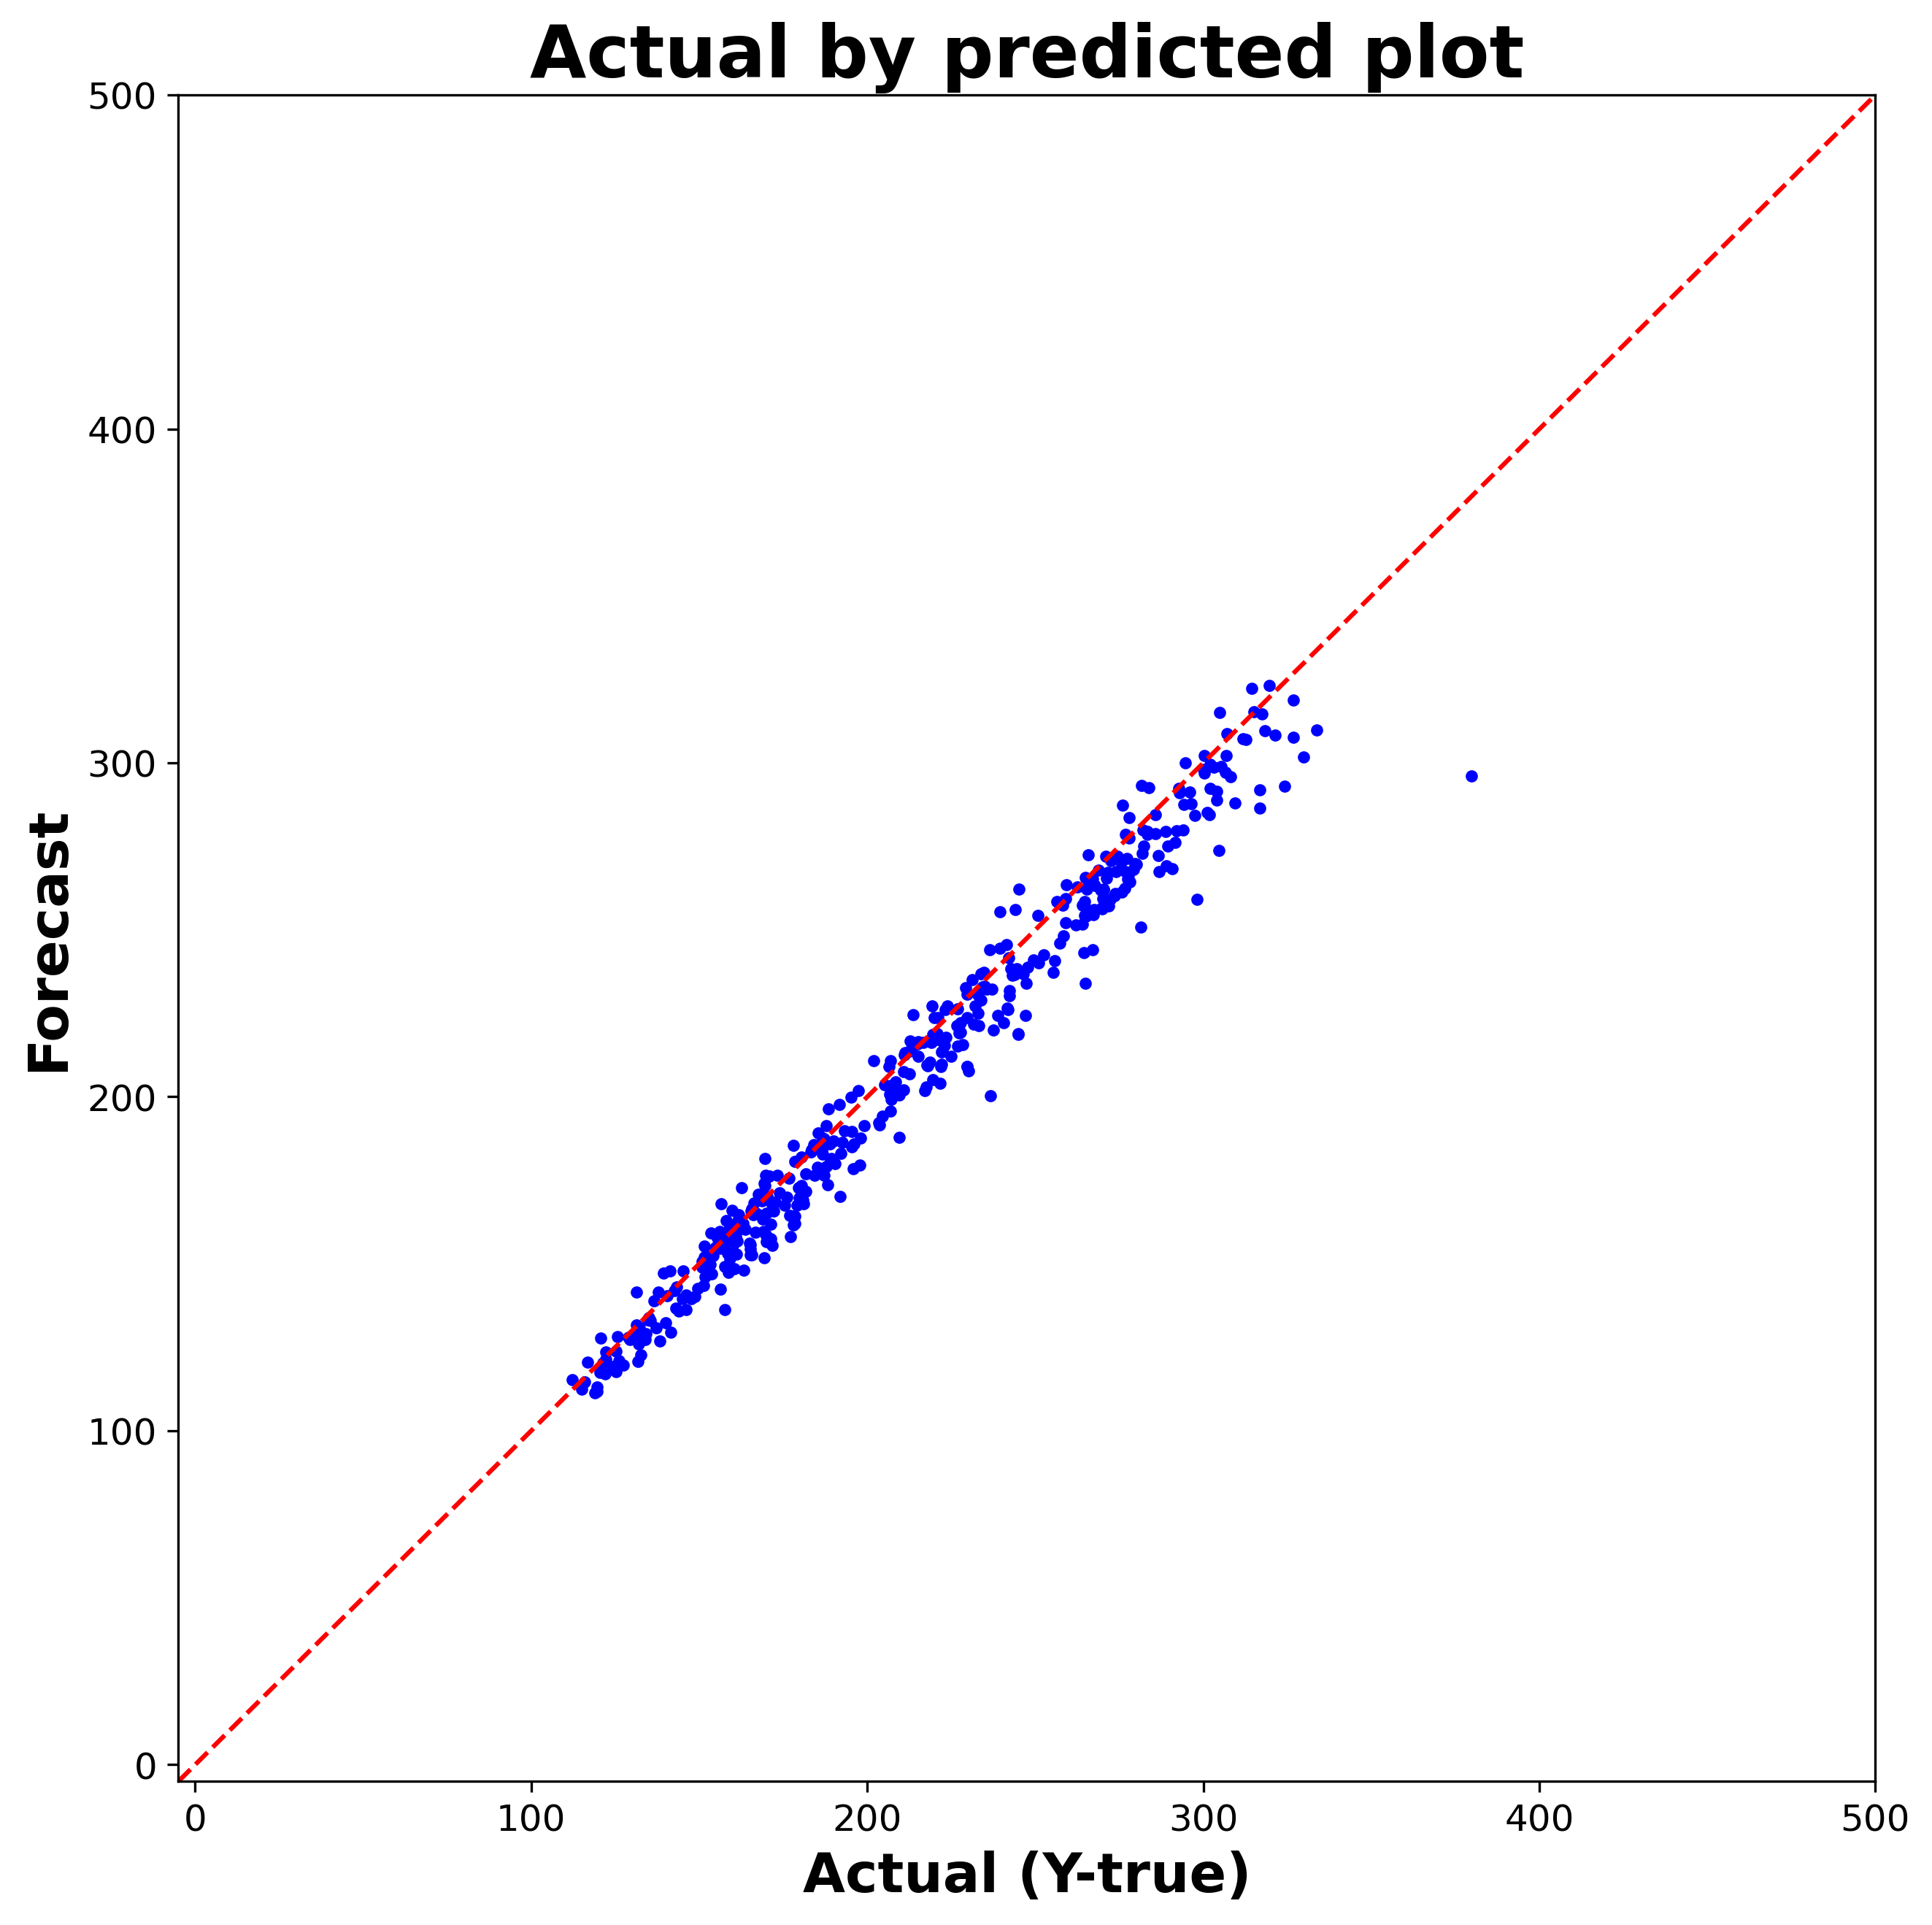

In [ ]:
# Lock the scale of axis by Y_true
max_value=500
min_value=0-5

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Actual (Y-true)',fontsize=18,weight='bold')
plt.ylabel('Forecast',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0-5,max_value)
plt.xlim(0-5,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()